In [2]:
#Streaming data from Twitter 
!pip install  tweepy 
!pip install nltk

In [7]:
import tweepy as tw
consumer_key =   'sXxEobwFV4b1oEaigeF6sUsAb'# confidential
consumer_secret = '5R0I1UNItyvda96brk2aN3E1WMdoprbIpiVLTgoerOmDoOYTI7' # confidential
access_token =  '1444264136666353667-iHg1KKdK6Zowd7SlbiHkGcclLLzZ6B'# confidential
access_token_secret = 'HzdZCnP8TBotJSGVo4L7fk644OTHR6AgjBImxcaYHKcnw' # confidential

In [8]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [15]:
#import relevant libs
import requests
import os
import json
import pandas as pd
import csv
import datetime
import dateutil.parser
import unicodedata
import time
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer



#https://lunarcrush.com/influencers?metric=influencers_influential&symbol=ETH


In [11]:

users = ['elonmusk', 'saylor', 'MicroStrategy', 'BarrySilbert', 'BitcoinMagazine', 'brian_armstrong', 'CoinDesk', 'federalreserve', 'SecYellen', 'GaryGensler']

all_tweets = []
startDate = datetime.datetime(2020,3,4,0,0,0)
endDate = datetime.datetime(2022,3,3,0,0,0)

count_sleep = 0 
    
for i in range(len(users)): 
    user = users[i]
    print("User : ", user)
    tweets = api.user_timeline(user,include_rts = False,tweet_mode = 'extended')
    all_tweets.extend(tweets)
    oldest_id = tweets[-1].id
    while True:
        tweets = api.user_timeline(user,include_rts = False, max_id = oldest_id - 1,tweet_mode = 'extended')
        count_sleep += len(tweets)
        if len(tweets) == 0:
            break
        oldest_id = tweets[-1].id
        all_tweets.extend(tweets)
        tweet = tweets[-1]
        created = tweet.created_at
        if created < startDate: 
            break 
        if count_sleep > 1000: 
            time.sleep(60)
            count_sleep = 0 
        print('N of tweets downloaded till now {}'.format(len(all_tweets)))

User :  elonmusk
N of tweets downloaded till now 39
User :  saylor
N of tweets downloaded till now 77
N of tweets downloaded till now 97
N of tweets downloaded till now 117
N of tweets downloaded till now 137
N of tweets downloaded till now 157
N of tweets downloaded till now 176
N of tweets downloaded till now 196
N of tweets downloaded till now 216
N of tweets downloaded till now 234
N of tweets downloaded till now 254
N of tweets downloaded till now 274
N of tweets downloaded till now 294
N of tweets downloaded till now 314
N of tweets downloaded till now 334
N of tweets downloaded till now 354
N of tweets downloaded till now 374
N of tweets downloaded till now 393
N of tweets downloaded till now 412
N of tweets downloaded till now 431
N of tweets downloaded till now 450
N of tweets downloaded till now 470
N of tweets downloaded till now 487
N of tweets downloaded till now 506
N of tweets downloaded till now 526
N of tweets downloaded till now 546
N of tweets downloaded till now 566

In [12]:
from pandas import DataFrame
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]
df = DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text"])

df

,id,created_at,favorite_count,retweet_count,text
0,1501796086255693827,2022-03-10 05:44:23,884,70,@WholeMarsBlog @Erdayastronaut @CopSub This we...
1,1501676656867614720,2022-03-09 21:49:49,27859,2426,@FedorovMykhailo @OMarkarova You’re welcome. W...
2,1501674678976450563,2022-03-09 21:41:57,9418,602,"@PPathole @SpaceX Optimized, fully-reusable St..."
3,1501673373813907464,2022-03-09 21:36:46,4060,202,"@Erdayastronaut @CopSub In our experience, COP..."
4,1501641453088518144,2022-03-09 19:29:56,2052,122,@Kristennetten @BBCScienceNews There is no dir...
...,...,...,...,...,...
12422,1420037010979491846,2021-07-27 15:03:01,498,55,ICYMI: Check out our final rulemaking agenda.\...
12423,1419770683744206860,2021-07-26 21:24:43,436,17,@HesterPeirce @swadamske @SECGov Thank you @He...
12424,1419730488089092100,2021-07-26 18:45:00,3382,327,Today is Gurbir Grewal’s first day @SECGov. I ...
12425,1419705259136585729,2021-07-26 17:04:45,1373,105,"I’m animated every day by working families, by..."


In [13]:
df.to_csv('finaldf.csv', index=False)

In [17]:
import nltk
nltk.download('vader_lexicon')

def time_stamp(date): 
    date = str(date)
    filtered_date = date[:10]
    return filtered_date


def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


def prep_data(tweet):
    extra_stopwords = ["The", "It", "it"]
    tweet = re.sub("https?:\/\/\S+", "", tweet)  # replacing url with domain name
    tweet = re.sub("#[A-Za-z0–9]+", " ", tweet)  # removing #mentions
    tweet = re.sub("#", " ", tweet)  # removing hash tag
    tweet = re.sub("\n", " ", tweet)  # removing \n
    tweet = re.sub("@[A-Za-z0–9]+", "", tweet)  # removing @mentions
    tweet = re.sub("RT", "", tweet)  # removing RT
    tweet = re.sub("^[a-zA-Z]{1,2}$", "", tweet)  # removing 1-2 char long words
    tweet = re.sub("\w*\d\w*", "", tweet)  # removing words containing digits
    for word in extra_stopwords:
        tweet = tweet.replace(word, " ")

    
    new_s = remove_emoji(tweet)
    return new_s
    

sia = SentimentIntensityAnalyzer()
def sentiment_analysis_cpd(tweet): 
    return sia.polarity_scores(tweet).get('compound')

def sentiment_analysis_neg(tweet): 
    return sia.polarity_scores(tweet).get('neg')

def sentiment_analysis_neu(tweet): 
    return sia.polarity_scores(tweet).get('neu')

def sentiment_analysis_pos(tweet): 
    return sia.polarity_scores(tweet).get('pos')


df['clean_tweet'] = df['text'].apply(prep_data)
df['created_at'] = df['created_at'].apply(time_stamp)
df['compound'] = df['clean_tweet'].apply(sentiment_analysis_cpd)
df['negative'] = df['clean_tweet'].apply(sentiment_analysis_neg)
df['positive'] = df['clean_tweet'].apply(sentiment_analysis_pos)
df['neutral'] = df['clean_tweet'].apply(sentiment_analysis_neu)
df = df.reset_index().drop(columns=['index', 'id'])
df


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,created_at,favorite_count,retweet_count,text,clean_tweet,compound,negative,positive,neutral
0,2022-03-10,884,70,@WholeMarsBlog @Erdayastronaut @CopSub This we...,This weekend,0.0000,0.000,0.000,1.000
1,2022-03-09,27859,2426,@FedorovMykhailo @OMarkarova You’re welcome. W...,You’re welcome. We have also sent power adap...,0.4588,0.000,0.120,0.880
2,2022-03-09,9418,602,"@PPathole @SpaceX Optimized, fully-reusable St...","Optimized, fully-reusable Starship is ~ to s...",0.4588,0.000,0.143,0.857
3,2022-03-09,4060,202,"@Erdayastronaut @CopSub In our experience, COP...","In our experience, COPV gain/pain flattens o...",-0.5233,0.200,0.063,0.736
4,2022-03-09,2052,122,@Kristennetten @BBCScienceNews There is no dir...,re is no direct evidence of that ad being r...,-0.2244,0.058,0.000,0.942
...,...,...,...,...,...,...,...,...,...
12422,2021-07-27,498,55,ICYMI: Check out our final rulemaking agenda.\...,ICYMI: Check out our final rulemaking agenda. ...,-0.1280,0.111,0.071,0.818
12423,2021-07-26,436,17,@HesterPeirce @swadamske @SECGov Thank you @He...,Thank you . I appreciate the warm welcome a...,0.8442,0.000,0.502,0.498
12424,2021-07-26,3382,327,Today is Gurbir Grewal’s first day @SECGov. I ...,Today is Gurbir Grewal’s first day . I look fo...,0.7088,0.000,0.160,0.840
12425,2021-07-26,1373,105,"I’m animated every day by working families, by...","I’m animated every day by working families, by...",0.4404,0.000,0.121,0.879


In [18]:
mean_sentiment = df.groupby('created_at')['compound'].mean()
number_of_daily_tweets = df.groupby('created_at').size()

print("Sentiment Avg of all tweeets : ", mean_sentiment)
print("Number of Tweets Daily: ", number_of_daily_tweets)

Sentiment Avg of all tweeets :  created_at
2019-05-02    0.718400
2019-06-20    0.133967
2020-01-18    0.440400
2020-02-28    0.194283
2020-02-29    0.000000
                ...   
2022-03-06    0.160853
2022-03-07    0.084522
2022-03-08    0.078353
2022-03-09    0.198771
2022-03-10    0.160133
Name: compound, Length: 722, dtype: float64
Number of Tweets Daily:  created_at
2019-05-02      1
2019-06-20      3
2020-01-18      1
2020-02-28      6
2020-02-29      1
             ... 
2022-03-06     38
2022-03-07     87
2022-03-08     80
2022-03-09    121
2022-03-10      6
Length: 722, dtype: int64


In [19]:

df_cpd = mean_sentiment.to_frame()
df_daily = number_of_daily_tweets.to_frame().rename(columns = {'0': 'Number'})
df_tweets = pd.merge(df_cpd, df_daily, how = "inner", on = 'created_at')
df_tweets

,compound,0
created_at,,
2019-05-02,0.718400,1
2019-06-20,0.133967,3
2020-01-18,0.440400,1
2020-02-28,0.194283,6
2020-02-29,0.000000,1
...,...,...
2022-03-06,0.160853,38
2022-03-07,0.084522,87
2022-03-08,0.078353,80


In [20]:
 #After filtering out 

In [21]:
df

,created_at,favorite_count,retweet_count,text,clean_tweet,compound,negative,positive,neutral
0,2022-03-10,884,70,@WholeMarsBlog @Erdayastronaut @CopSub This we...,This weekend,0.0000,0.000,0.000,1.000
1,2022-03-09,27859,2426,@FedorovMykhailo @OMarkarova You’re welcome. W...,You’re welcome. We have also sent power adap...,0.4588,0.000,0.120,0.880
2,2022-03-09,9418,602,"@PPathole @SpaceX Optimized, fully-reusable St...","Optimized, fully-reusable Starship is ~ to s...",0.4588,0.000,0.143,0.857
3,2022-03-09,4060,202,"@Erdayastronaut @CopSub In our experience, COP...","In our experience, COPV gain/pain flattens o...",-0.5233,0.200,0.063,0.736
4,2022-03-09,2052,122,@Kristennetten @BBCScienceNews There is no dir...,re is no direct evidence of that ad being r...,-0.2244,0.058,0.000,0.942
...,...,...,...,...,...,...,...,...,...
12422,2021-07-27,498,55,ICYMI: Check out our final rulemaking agenda.\...,ICYMI: Check out our final rulemaking agenda. ...,-0.1280,0.111,0.071,0.818
12423,2021-07-26,436,17,@HesterPeirce @swadamske @SECGov Thank you @He...,Thank you . I appreciate the warm welcome a...,0.8442,0.000,0.502,0.498
12424,2021-07-26,3382,327,Today is Gurbir Grewal’s first day @SECGov. I ...,Today is Gurbir Grewal’s first day . I look fo...,0.7088,0.000,0.160,0.840
12425,2021-07-26,1373,105,"I’m animated every day by working families, by...","I’m animated every day by working families, by...",0.4404,0.000,0.121,0.879


In [22]:
df_temp = df.copy()
df_temp

,created_at,favorite_count,retweet_count,text,clean_tweet,compound,negative,positive,neutral
0,2022-03-10,884,70,@WholeMarsBlog @Erdayastronaut @CopSub This we...,This weekend,0.0000,0.000,0.000,1.000
1,2022-03-09,27859,2426,@FedorovMykhailo @OMarkarova You’re welcome. W...,You’re welcome. We have also sent power adap...,0.4588,0.000,0.120,0.880
2,2022-03-09,9418,602,"@PPathole @SpaceX Optimized, fully-reusable St...","Optimized, fully-reusable Starship is ~ to s...",0.4588,0.000,0.143,0.857
3,2022-03-09,4060,202,"@Erdayastronaut @CopSub In our experience, COP...","In our experience, COPV gain/pain flattens o...",-0.5233,0.200,0.063,0.736
4,2022-03-09,2052,122,@Kristennetten @BBCScienceNews There is no dir...,re is no direct evidence of that ad being r...,-0.2244,0.058,0.000,0.942
...,...,...,...,...,...,...,...,...,...
12422,2021-07-27,498,55,ICYMI: Check out our final rulemaking agenda.\...,ICYMI: Check out our final rulemaking agenda. ...,-0.1280,0.111,0.071,0.818
12423,2021-07-26,436,17,@HesterPeirce @swadamske @SECGov Thank you @He...,Thank you . I appreciate the warm welcome a...,0.8442,0.000,0.502,0.498
12424,2021-07-26,3382,327,Today is Gurbir Grewal’s first day @SECGov. I ...,Today is Gurbir Grewal’s first day . I look fo...,0.7088,0.000,0.160,0.840
12425,2021-07-26,1373,105,"I’m animated every day by working families, by...","I’m animated every day by working families, by...",0.4404,0.000,0.121,0.879


In [23]:
def filtered_words(tweet): 
    crypto_words = ['bitcoin', 'btc', 'Bitcoin', 'BTC', 'cryptocurrency', 'crypto', 'market', '$BTC']
    for i in range(len(crypto_words)): 
        if crypto_words[i] in tweet: 
            return True
    return False 

for i in range(len(df_temp)): 
    tweet = df_temp.loc[i, 'clean_tweet']
    if filtered_words(tweet) == False: 
        df_temp.drop(i,inplace=True)


In [24]:
#mean_sentiment = df.groupby('date')['compound'].mean()
number_of_daily_tweets = df_temp.groupby('created_at').size()

#print("Daily Sentiment : ", mean_sentiment)
print("Daily Number of Tweets : ", len(number_of_daily_tweets))

Daily Number of Tweets :  352


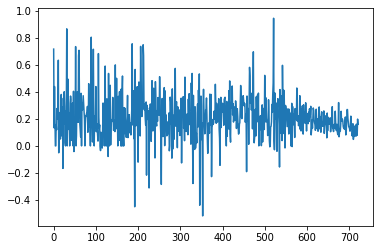

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
x = np.arange(0, len(mean_sentiment))
plt.plot(x, mean_sentiment)